## automating the detection of forged banknotes using a K-means Clustering algorithm

### Part 1 – The purpose of this project
The detection of forged bank notes is an incredibly important part of the daily operation of
any bank. In 2019, around 427,000 counterfeit Bank of England banknotes with a face value
of £9.8 million were taken out of circulation.

The process of detecting forged banknotes manually may be time consuming and possibly
inaccurate, and for these reasons it may be worth considering automating the process of
detecting forgeries.

In this report we will consider a model which has been trained to test features of various
banknotes and attempt to detect forgeries. We will then discuss the results of this model and
whether this solution could be of benefit to your bank.

The model used for this demonstration is an algorithm called K-means Clustering. This algorithm 
looks at a given set of data and sorts the data into a user-defined number of categories, or clusters. 
Since we want to test if a bank note is real or not, we set the algorithm to provide us with just two 
of these clusters: Genuine and Forged. 

### Part 2 – Describing the data
The data we used to train our model is the Banknote authentication Data Set from
University of California, Irvine. This dataset contains observations of 1372 individual bank
notes, each with four attributes we can measure with our algorithm.

The attributes themselves are based on image wavelet transformations, which are essentially methods used to
convert images in to numbers the algorithm can make use of. For the purpose of this model
we are only considering two of these transformations which are labelled V1 and V2.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from sklearn.cluster import KMeans
%matplotlib inline

In [23]:
df = pd.read_csv('Banknote-authentication-dataset.csv')
df.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [7]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


### Part 3 – Analyzing the data
To visualise the banknote data, we first produced a scatter plot to observe the relationship
between our two parameters V1 and V2. To prepare our data for use by the K-means Clustering algorithm we are also normalising the data, to transform each variable to a value between 0-1. 

Each point in the below graph represents a single
bank note in the data. Note that at this point the data is unlabelled – that is we do not know
which notes are genuine or counterfeit. 

In [8]:
normalized_df = (df-df.min())/(df.max()-df.min())

In [9]:
normalized_df.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


In [10]:
normalized_df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


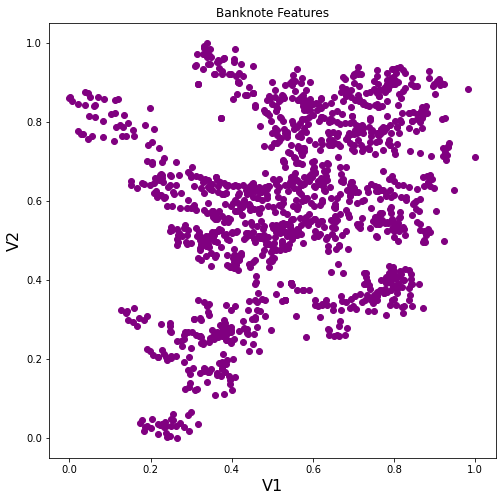

In [11]:
fig, graph = plt.subplots(figsize=(8,8))
graph.scatter(x='V1', y='V2', data=normalized_df, c=['Purple'])
plt.xlabel('V1', {'size':16})
plt.ylabel('V2', {'size':16})
plt.title('Banknote Features')

mean_patch = ptc.Ellipse([normalized_df['V1'].mean(), normalized_df['V2'].mean()], 2*normalized_df['V1'].std(), 2*normalized_df['V2'].std(), alpha=0.25, color='Orange')

plt.savefig('plot1')

We can see from the data that there is a significant degree of variance for both V1 and V2 in
the bank notes in our sample, however by looking at this data it is difficult to suggest where a
line could be drawn to divide these notes in to two categories. This is where our algorithm
comes in to use.

In [12]:
normalized_df.corr()

,V1,V2
V1,1.000000,0.264026
V2,0.264026,1.000000


In [13]:
model = KMeans(n_clusters=2)

In [14]:
model.fit(normalized_df)

KMeans(n_clusters=2)

In [15]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
# Add the results of the algorithm to the dataframe
normalized_df['label'] = model.labels_

In [17]:
normalized_df.head()

,V1,V2,label
0,0.769004,0.839643,0
1,0.835659,0.820982,0
2,0.786629,0.416648,0
3,0.757105,0.871699,0
4,0.531578,0.348662,1


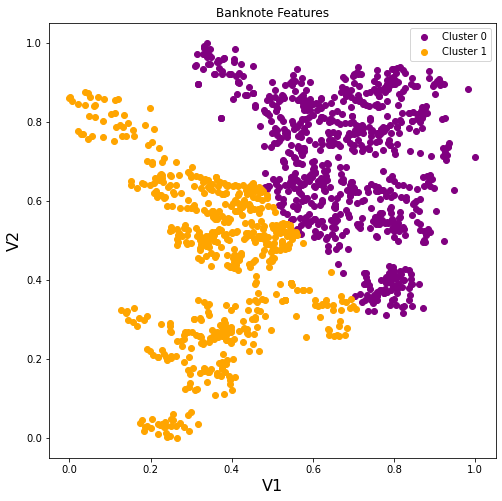

In [18]:
fig, graph = plt.subplots(figsize=(8,8))
graph.scatter(x='V1', y='V2', data=normalized_df[normalized_df['label'] == 0], label='Cluster 0', c='Purple')
graph.scatter(x='V1', y='V2', data=normalized_df[normalized_df['label'] == 1], label='Cluster 1', c='Orange')
plt.xlabel('V1', {'size':16})
plt.ylabel('V2', {'size':16})
plt.title('Banknote Features')
plt.legend()

Here we have used the K-means Clustering algorithm to split the data in to two clusters.
Though we haven’t labelled which of these clusters represents real or forged bank notes at
this time, what is important is that the algorithm has analysed the data and defined the two
most prominent clusters. 

In [19]:
model2 = KMeans(n_clusters=2)
model2.fit(normalized_df)
model2.labels_
normalized_df['label 2'] = model2.labels_
normalized_df.head()

,V1,V2,label,label 2
0,0.769004,0.839643,0,1
1,0.835659,0.820982,0,1
2,0.786629,0.416648,0,1
3,0.757105,0.871699,0,1
4,0.531578,0.348662,1,0


In [20]:
model3 = KMeans(n_clusters=2)
model3.fit(normalized_df)
model3.labels_
normalized_df['label 3'] = model2.labels_
normalized_df.head()

,V1,V2,label,label 2,label 3
0,0.769004,0.839643,0,1,1
1,0.835659,0.820982,0,1,1
2,0.786629,0.416648,0,1,1
3,0.757105,0.871699,0,1,1
4,0.531578,0.348662,1,0,0


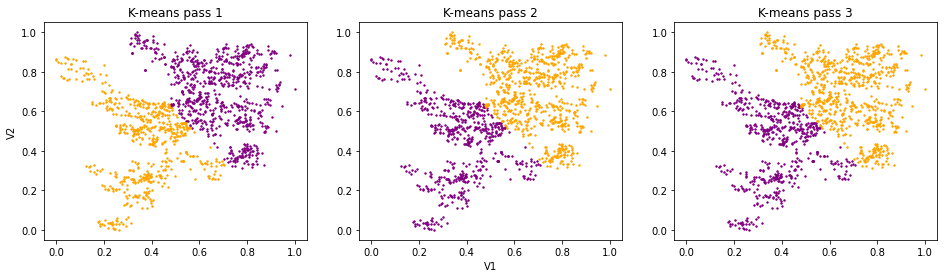

In [21]:
fig, graph = plt.subplots(1, 3, figsize=(16,4))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("V1")
plt.ylabel("V2")

graph[0].set_title('K-means pass 1')
graph[0].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label'] == 0], label='Cluster 0', c='Purple', s=2)
graph[0].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label'] == 1], label='Cluster 1', c='Orange', s=2)

graph[1].set_title('K-means pass 2')
graph[1].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label 2'] == 0], label='Cluster 0', c='Purple', s=2)
graph[1].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label 2'] == 1], label='Cluster 1', c='Orange', s=2)

graph[2].set_title('K-means pass 3')
graph[2].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label 3'] == 0], label='Cluster 0', c='Purple', s=2)
graph[2].scatter(x='V1', y='V2', data=normalized_df[normalized_df['label 3'] == 1], label='Cluster 1', c='Orange', s=2)

# plt.savefig('plot3')

Each time we run K-means Clustering, the algorithm begins by creating starting points for
each cluster at random. This means we can run the algorithm multiple times and test if we
obtain the same results. Since in this case we have consistently identified the same clusters in
the data we can be confident the model is working as intended and the clusters it has
identified are a reliable means by which to group our data points.

## Testing predictions

In [27]:
full_df = pd.read_csv('Banknote-full.csv')

In [28]:
full_df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [29]:
df['prediction'] = normalized_df['label']
df['class'] = full_df['Class'] - 1

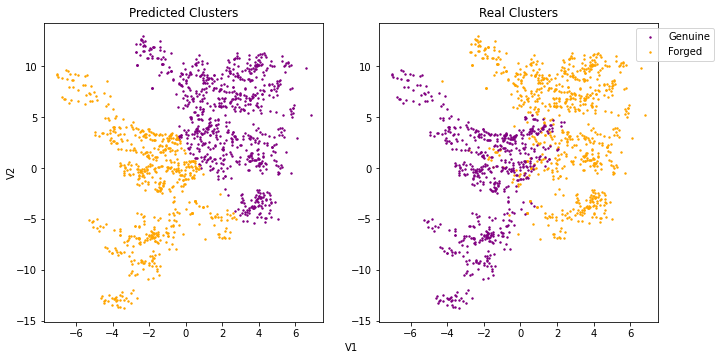

In [30]:
fig, graph = plt.subplots(1, 2, figsize=(11,5.5))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("V1")
plt.ylabel("V2")

graph[0].set_title('Predicted Clusters')
scatter1 = graph[0].scatter(x='V1', y='V2', data=df[df['prediction'] == 0], label='Cluster 0', c='Purple', s=2)
scatter2 = graph[0].scatter(x='V1', y='V2', data=df[df['prediction'] == 1], label='Cluster 1', c='Orange', s=2)

graph[1].set_title('Real Clusters')
graph[1].scatter(x='V1', y='V2', data=df[df['class'] == 0], label='Cluster 0', c='Orange', s=2)
graph[1].scatter(x='V1', y='V2', data=df[df['class'] == 1], label='Cluster 1', c='Purple', s=2)

plt.legend([scatter1, scatter2], ['Genuine', 'Forged'], loc='upper right', bbox_to_anchor=(1.1,1))

plt.savefig('plot4')

Here we have plotted our predicted results (left) against that of the real data (right). We can
see from these visualisations that the clusters identified by our model are somewhat accurate.
In fact, out of 1372 bank notes, our model was able to correctly classify 1197, or 87.2%.

In [31]:
df[df['prediction'] == df['class']].count()

V1            1197
V2            1197
prediction    1197
class         1197
dtype: int64

In [32]:
correct = df[df['prediction'] != df['class']].count()

In [33]:
correct / df['V1'].count()

V1            0.127551
V2            0.127551
prediction    0.127551
class         0.127551
dtype: float64

### Part 4 – Recommendations
The K-means Clustering algorithm was able to successfully identify genuine and forged bank
notes 87.2% of the time. While 87.2% is a reasonable rate of success, it is important to
consider several factors when considering whether to implement this model in your business.

It is worth noting that 87.2% is an overall accuracy score for the model. Of the banknotes
labelled incorrectly, these are a combination of false positives (i.e. genuine notes labelled as
forged) and false negatives (forged notes labelled as genuine). This could be investigated
further, and it would be worth considering which of these errors is best avoided. Is it more
damaging to dispose of genuine notes, or to unknowingly recirculate fraudulent notes?

A solution to be considered may be using multiple methods of identification. This model
could be used alongside a secondary source of identification in order to ‘double check’ the
results of the other system and create a more accurate system overall.

Finally, it is left to the business to consider the cost of any given system. While using a model
to predict the authenticity of banknotes may be more accurate than what is possible by a
human or alternative system, steps need to be taken to measure the various qualities of any
given note and input these measurements in to the model. These measurements could be
made by machines or people, but either way would incur costs which would need to be
considered.